# Diversify Your Risk Exposure With Factor Investing
## Increase your chances of catching a rising trend with this new portfolio management technique!

### By Justin Jimenez

You may not feel this way, but for many investors and traders, the stock market is a game, and we all want to move up on the leaderboard. That's really why you're here right? You want to beat the market, just like every other investor. I do too; that's why I research portfolio management theory, and it's why I write these stories.

In my last story I explored how to increase your portfolio returns using different portfolio management strategies. If you read that story, you would have learned how you can optimize your portfolio's weight distributions to match your desired balance between risk and return while simultaneously multiplying your gains.

In this story, I want to revisit one of the earlier steps of that process that I skimmed over - how do you actually determine which stocks will give you the best return?

To answer this question, I'm going to share a method with you called factor investing. I found this topic to be relatively easy to implement but also incredibly arduous to fully comprehend. 

I'm going to break down the concepts as best as I can. By the end of this story I want you to walk away with an understanding of the relationship between risk and return; what factor investing is; how to implement a multi-factor model; and how to evaluate different models.

# First Physics, Then God
Please bear with me. I'm not going to try to convert you to my religion; I'm only digressing to a brief discussion of physics because I find it easier to digest difficult topics by drawing parallels to other topics that I am familiar with.

While learning about factor investing, I really struggled to understand what is the significance of the models. What do you accomplish by building a model? I found this video to answer my question, and it immediately reminded me of the ongoing mystery of dark matter and dark energy. So, I want to discuss those two topics to anchor your understanding of models, their purpose, and their flaws.

I studied classical mechanics in college, which covers the fundamentals that can be applied to your everyday physics problems. Classical mechanics can be used to describe the motion of objects on earth (common homework problems involve shooting a cannonball from a hilltop) as well as the motion of planets within a solar system. Many of these cases heavily rely on Isaac Newton's three laws of motion:

1. Objects in motion stay in motion unless acted upon by a net force.
2. The force (F) experienced by an object is equal to the product of it's mass (m) and the acceleration of the object (a).
3. Every force produces an equal and opposite force.

These three laws provided an elegant framework for modeling any physics homework problem for almost three centuries. Then, in the 20th century, the universe was plunged into darkness.

In 1907, Albert Einstein began to develop his theory of general relativity. I won't go into the math of this theory (not that I could if I tried), but the reason this theory came about was because Einstein found that the rules of classical mechanics were insufficient to model black holes. 

Black holes are best described as "regions of space where gravitational attraction is so strong that not even light can escape". In this case, Newton's laws just don't work out, so Einstein modified the existing model of gravity to describe your everyday cannonball warfare and the black hole that threatens the existence of our galaxy. How nice.

One of the contended components of general relativity was a term referred to as the cosmological constant (AKA lambda). At the time, Einstein used the cosmological constant as a way to model a universe that was neither expanding nor collapsing. 

His model of gravity would have depicted a universe that collapses in on itself since bodies with high mass attract and consume bodies of smaller mass through the gravitational force. The cosmological constant was introduced as a way to oppose gravity and create a static model, even though Einstein thought that there was no real anti-gravity force. 

In 1929, Edwin P. Hubble found that the universe is in fact expanding, and Einstein removed the cosmological constant from his model, declaring it his life's "greatest blunder".

According to one of my favorite books, "Astrophysics for People in a Hurry" by Neil DeGrasse Tyson, it wasn't until 1998 that we discovered that the cosmological constant actually provides a more accurate model of the universe. 

Two teams of astrophysicists lead by Saul Perlmutter, Brian Schmidt, and Adam Riess found supernovas that were farther away than their current models predicted, but were accurately described by Einstein's model with the cosmological constant. This mysterious anti-gravity force that accelerates the expansion of the universe was given the moniker "dark energy".

The other dark finding of the 20th century came in 1937 when Fritz Zwicky studied the movement of the Coma cluster. Zwicky found that the average velocity of some galaxies in this cluster were so great that they exceeded the theoretical escape velocity - the speed needed to escape the orbit of a large body such as a planet or cluster. He surmised that a large body or bodies of high mass must be responsible for the observed velocity, but his estimate for the mass of the system did not align with his estimate for the mass needed to match the observed speeds.

This finding meant that the Coma cluster and other similar bodies of high mass contain some matter, now known as dark matter, that cannot be observed in the typical way, but that still exerts some gravitational force. In other words, it is a phenomena that exists outside the boundary of our current cosmological model. "Astrophysics For People In A Hurry" cites:

"The most accurate measurements to date reveal dark energy as the most prominent thing in town, currently responsible for 68 percent of all the mass- energy in the universe; dark matter comprises 27 percent, with regular matter comprising a mere 5 percent." 
- Neil DeGrasse Tyson, Astrophysics For People In A Hurry

In other words, our current model of the universe only explains about 5% of everything that is out there.

Now, at this point, a less scientifically-oriented person might posit that the other 95% is some mystery designed by God that we feeble minded humans will never comprehend. I'm not going to contend with that view; you're entitled to have your own faith, and I'm not here to take that from you. What I will assert is that scientific models are born from the scientific method, and any flaws in that model should be contended with through that same process.

If a model fails to explain some phenomena, don't bring blind faith into its evaluation and chalk it up to a higher power. Stick to the process, conduct experiments, analyze the data, and formulate a better model. Be like Einstein.

# Factor Analysis, Simple Models, and Their Flaws
I apologize if you feel that I got carried away with my digression; I'm passionate about science, and I hope that my analogy will make sense in the context of factor investing.

You see, factor investing is based on a more broad concept called factor analysis. Factor analysis is a method of developing a model that explains the relationship between one or more independent variables (factors) with a dependent variable. 

To illustrate factor analysis, imagine that Newton's second law didn't exist, and you were trying to pioneer a model to predict how much someone weighs using data about their body mass. You might find that a person's weight, a dependent variable (also referred to as a response), depends on a factor that is an independent variable (also referred to as a feature or explanatory variable). That factor would be the person's body mass.

So you go out and collect data on the mass (kilograms) and weight (Newtons) of different people. Some people, like children and women, don't weigh as much or have as much mass as other people, such as men or obese people. But you plot the data to try to find some relationship that explains how the two are related.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
from empyrial import empyrial, Engine
from statsmodels.iolib.summary2 import summary_col

In [ ]:
#create dataset
df = pd.DataFrame({'body_mass': [70, 47.18, 141, 61.14, 43.09, 88.45, 32.20, 19.50, 10.00],
                   'weight': [686.7, 462.8358, 1383.21, 599.7834, 422.7129, 867.6945, 315.882, 191.295, 98.1]})

plt.scatter(df.body_mass, df.weight)
plt.title('Body Mass vs. Weight')
plt.xlabel('Body Mass')
plt.ylabel('Weight')
plt.show()

Looking at the data it becomes obvious that there is a linear relationship between a person's body mass and their weight. However, in order to be able to predict someone's weight from their body mass, we need to know the coefficient in this proportional relationship. Therefore, we must find the slope of this line.

You could use simple algebra to find the slope of the line. However, I want to walk you through fitting a simple linear regression to the data to get some practice. Down below you'll find a few lines of code that defines our response (the dependent variable), the feature (independent variable), and a value for the intercept (.addconstant()). Then we fit an OLS regression and print the summary.

OLS stands for ordinary least squares. If the relationship between the feature and the response was not perfectly linear, there would be error values equal to the distance of each data point from the fitted line. This method of regression returns the best-fit line that has the lowest value equal to the sum of the squared error values.

In [2]:
# code sourced from Statology - How to Perform Simple Linear Regression in Python
# check references for a link to the source code

#define response
y = df['weight']

#define feature
x = df[['body_mass']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.108e+32
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          1.85e-110
Time:                        10:07:48   Log-Likelihood:                 257.30
No. Observations:                   9   AIC:                            -510.6
Df Residuals:                       7   BIC:                            -510.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.684e-14   6.36e-14      0.893      0.4

The summary contains a lot of important statistical metrics, but I want to draw your attention to a few key points. 

First, take a look at the coefficient for the body mass (in the middle row of the report). The coefficient is 9.81, which also happens to be the gravitational acceleration on Earth in meters per second squared. In this way, we have experimentally derived the alpha (acceleration) coefficient of Newton's second law, which also happens to be the slope of the line. 

Note that this coefficient is only true for objects on Earth; if we wanted to predict the weight of an astronaut on another planet, you would either need another OLS model tailored toward data taken on that planet, or you would need a more advanced model that could account for other factors, such as the mass and radius of the planet.

Second, above the coefficient for body_mass, notice that the coefficient for the intercept value we added with .add_constant() is nearly zero. This aligns with Newton's second law, where force is only the product of mass and acceleration with no additional intercept value.

Third, check out the r-squared and adjusted r-squared values in the upper right part of the report. They are both equal to one. 

Think of these values as representing the explanatory power of your model, where the value can range from 0 to 100% (1.00). Since the r-squared value is equal to 1.00, it can be said that our model can explain 100% of variation in the weight of an individual on earth as a function of the body mass factor. 

If the r-squared value were 0.50, that would mean that our model can only account for 50% of the variation in weight with respect to the body mass factor. The other 50% in variation would be attributed to some other unknown factor that our model does not account for.

An important facet to consider when creating models is over-fitting, which is when the model is constructed to almost perfectly fit historical data. In cases where the future is uncertain and the conditions of an environment are changing, an over-fitted model could be too tightly constrained to adapt to new changes. 

In our case, the laws of physics should not change over time, so we aren't too worried about over-fitting; to the contrary, physicists and other scientists actively pursue more descriptive models. However, if your model is not supposed to describe the laws of the universe, consider paying attention to the adjusted r-squared value, which penalizes models that include numerous factors in an attempt to achieve complete descriptiveness.

Lastly, we want to check for statistical significance to know that our factor and our model's predictive power can't be chalked up to sheer luck. 

The p-value of the body_mass factor (back to the middle row, P>|t|) is 0.0, so we can reject the null hypothesis of the body mass factor and consider it statistically significant. The p-value of the model (upper left again, Prob (F-statistic)) is so close to zero that I can't believe it doesn't actually just say zero, but that also means that the model is statistically significant. 

Since both the body_mass factor and the regression model are statistically significant, we can assert that the model has high explanatory power for predicting the weight of a person with regard to the body mass factor.
Now that we understand the basics of factor analysis and the purpose of creating models, let's apply what we've learned to investing.

# Modeling Risk and Reward With Factor Investing
Factor investing is the application of factor analysis to the relationship between risk and reward. You probably know, either by intuition or maxim, that more risky assets generally offer greater potential returns. For example, stocks are generally more risky than bonds, but stocks offer greater returns than bonds. In financial terms, it is said that you receive a premium for the risk you are taking.

Just like in physics, there are simple and complex models for factor investing, where simple models explain some of the relationship between risk and reward, and the more complex models explain more. 

All of these models rely upon the assumption of the efficient market hypothesis. This hypothesis states that the market prices already factor in all information; if this hypothesis is assumed to be true, it means that an investor cannot expect to reliably profit from some secret information that no one else has. Instead, any investor seeking to outperform the market must do so by exposing themselves to greater risk.

What's important to know is that there are different types of risk, and each risk has an associated premium attached to it. Based on that, each factor investing model seeks to explain how an investor could increase their portfolio return as a function of exposure to different risks. I'm going to go over three different factor investing models to show you how you can increase your portfolio returns by diversifying across five different types of risk.

# Systematic Risk With CAPM
CAPM, short for capital asset pricing model, is the quintessential factor investing model. The model was developed by Jack Treynor, William F. Sharpe (of the Sharpe ratio), John Lintner, and Jan Mossin by building upon the Markowitz mean variance optimization model (check out my story on mean-variance optimization and how to implement it).

While portfolio optimization methods seek to manage unsystematic risk - the risk associated with a particular company or industry - CAPM was developed to analyze the effect of systematic risk - the risk associated with exposure to the broader market. The model uses a simple equation, which states that a stock or portfolio's excess expected return is equal to the market's excess expected return times a coefficient named beta.

The excess expected return is defined as the difference between the average expected return and the risk-free rate of return - the return of an asset with negligible risk such as a 10 year treasury note. The beta coefficient represents the asset's exposure to the market; a beta above 1.0 indicates an asset that is more volatile than the market and a beta below 1.0 is an asset that is less volatile than the market.

As you might infer, this model can explain returns that are related to the risk of assets with a high beta. Since assets that are more volatile than the broader market carry greater risk, they also expect a greater average return as a premium for that risk.

The capital asset pricing model was the standard pricing model for decades until the research of Eugene Fama and Kenneth French. Since then, the CAPM has often been disregarded on account of it's relative explanatory obsolescence and it's unreasonable assumptions. This excerpt from SmartAsset.com explains it best:

" . . . beta doesn't acknowledge that price swings in either direction don't hold equal risk. And, using a particular period for risk assessment ignores that risk and returns don't distribute evenly over time.
The CAPM also presupposes a constant risk-free rate, which isn't always the case. A 1% bump in treasury bond interest rates would significantly affect that investment. Meanwhile, using a stock index like the S&P 500 only suggests a theoretical value. That index could perform differently over time."
 - Rachel Cautero, SmartAsset.com
 
With these limitations in mind, we must be like Einstein and pursue a more advanced model.

# Sophisticated Modeling With Fama-French 3 & 5 Factor Models
In 1992, renowned economists Eugene Fama and Kenneth French released groundbreaking research regarding the factor investing model established with the CAPM. They proposed two new factors that, when combined with the market exposure risk factor, would create a pricing model whose explanatory power would vastly supersede that of the CAPM. 

This model, known as the Fama-French 3 Factor Model, incorporated the size factor - referred to as SMB or small minus big - and the value factor - referred to as HML or high minus low. These two new factors were based on research that showed a historic outperformance of small cap stocks over large cap stocks (the size factor) and value stocks with high book-to-market ratios over growth stocks. Together, this three factor model was found to explain as much as 95% of variation in portfolio returns.

Since the inception of the three factor model, other researchers have attempted to discover and implement other factors to develop a more robust model. In 2014, Fama and French improved upon their three factor model with a new five factor model that incorporates a profitability factor - RMW or robust minus weak - and an investment factor - CMA or conservative minus aggressive. These factors were based on findings that companies that report higher future earnings and and that are more conservative with investing capital tend to outperform. 

Using this five factor model can give you a competitive edge by allowing you to analyze your exposure to these five different types of risk.

# Creating the Models
Below you will find a function that accepts a DataFrame that contains a column named 'Returns' as an argument. I found this function on this website called Pythonic Finance. It uses pandas datareader to pull the Fama-French factors from Kenneth French's database. It then merges that DataFrame with the argument DataFrame, calculates the excess expected return of the asset, and fits an OLS regression. I've added some supplementary comments to clarify what does what when necessary.

In [2]:
import statsmodels.formula.api as sm # switch to statsmodels.formula.api because statsmodels.api kept throwing me an error

def assetPriceReg(df_stk):
    import pandas_datareader.data as web  # module for reading datasets directly from the web
    
    # Reading in factor data
    df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')[0]
    df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True) # rename the market excess expected return column
    df_factors['MKT'] = df_factors['MKT']/100
    df_factors['SMB'] = df_factors['SMB']/100
    df_factors['HML'] = df_factors['HML']/100
    df_factors['RMW'] = df_factors['RMW']/100
    df_factors['CMA'] = df_factors['CMA']/100
    
    df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # Merging the stock and factor returns dataframes together
    df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Calculating asset excess expected returns
    print(df_stock_factor)
    
    # Running CAPM, FF3, and FF5 models.
    CAPM = sm.ols(formula = 'XsRet ~ MKT', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF3 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF5 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML + RMW + CMA', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    CAPMtstat = CAPM.tvalues
    FF3tstat = FF3.tvalues
    FF5tstat = FF5.tvalues

    CAPMcoeff = CAPM.params
    FF3coeff = FF3.params
    FF5coeff = FF5.params

    # DataFrame with coefficients and t-stats
    results_df = pd.DataFrame({'CAPMcoeff':CAPMcoeff,'CAPMtstat':CAPMtstat,
                               'FF3coeff':FF3coeff, 'FF3tstat':FF3tstat,
                               'FF5coeff':FF5coeff, 'FF5tstat':FF5tstat},
    index = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])

    dfoutput = summary_col([CAPM,FF3, FF5],stars=True,float_format='%0.4f',
                  model_names=['CAPM','FF3','FF5'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'Adjusted R2':lambda x: "{:.4f}".format(x.rsquared_adj)}, 
                             regressor_order = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])

    print(f'\nThe CAPM Results are: \n{CAPM.summary()}')
    print(f'\nThe Fama-French 3 Factor Model Results are: \n{FF3.summary()}')
    print(f'\nThe Fama-French 5 Factor Model Results are: \n{FF5.summary()}')
    print(f'\nSummary of Results: {dfoutput}')
    return results_df


Now let's run the models on an asset. How about a potential portfolio?

I'm using the Empyrial package to construct optimized weights for a portfolio. I went over this package extensively in my last story, "What's the Best Portfolio Optimization Method for You?". 

I'm going to try to choose some diverse stocks like a gold ETF, bond ETF, a bitcoin mutual fund, Bank of America, Boeing, Shopify, and a couple of index ETFs. I'm going to pull the returns of this portfolio from the empyrial object and store the data in a DataFrame, which will be passed into the assetPriceReg() function. I'm also going to use the mean variance optimizer since the hierarchical risk parity optimizer gave me a strong weight on the bond ETF. Feel free to experiment with different optimizers and stocks!

In [23]:
# There are 2 tables on the Wikipedia page
# we want the first table

payload=pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')
first_table = payload[0]
second_table = payload[1]
third_table = payload[2]

QQQ = payload[3]
print([ticker for ticker in QQQ['Ticker']])

['ATVI', 'ADBE', 'AMD', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'TEAM', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CRWD', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'FAST', 'FISV', 'FOXA', 'FOX', 'GILD', 'HON', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LULU', 'MAR', 'MRVL', 'MTCH', 'MELI', 'FB', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'OKTA', 'PCAR', 'PAYX', 'PYPL', 'PTON', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'TCOM', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XEL', 'XLNX', 'ZM']


Start date: 2014-10-01
End date: 2021-11-27


,Backtest
,
Annual return,78.13%
Cumulative return,6010.48%
Annual volatility,31.42 %
Winning day ratio,57.6%
Sharpe ratio,1.99
Calmar ratio,2.02
Information ratio,-0.0
Stability,0.95
Max Drawdown,-38.49 %


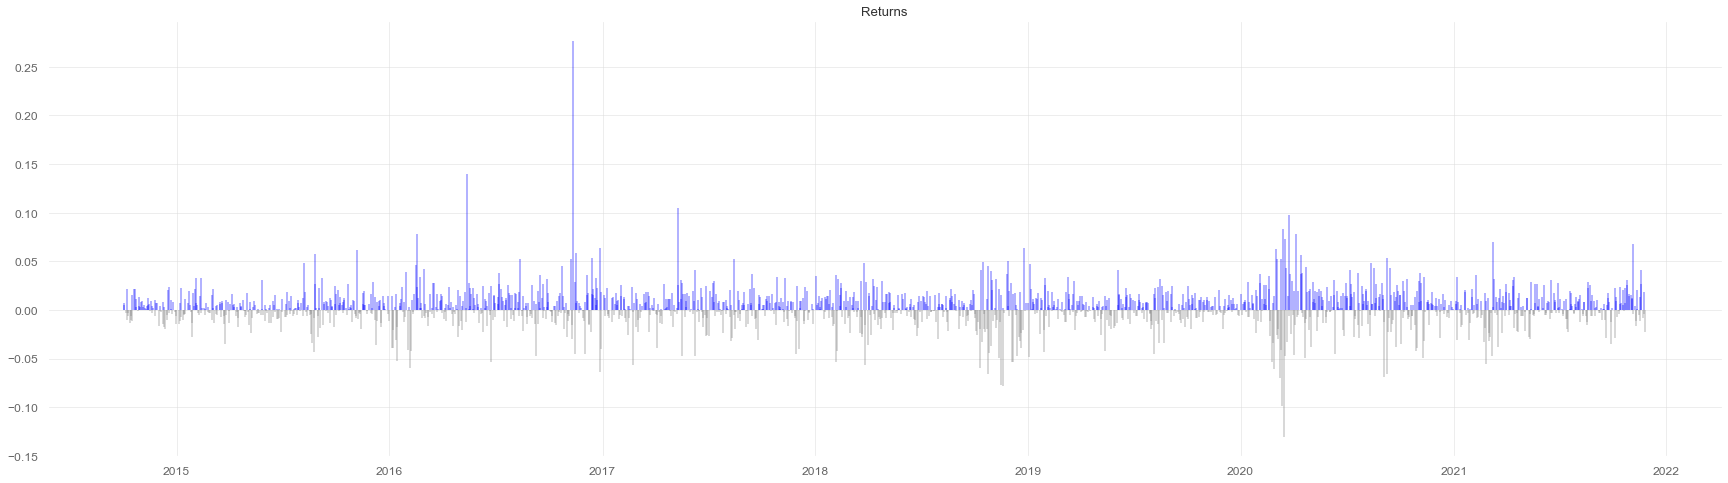

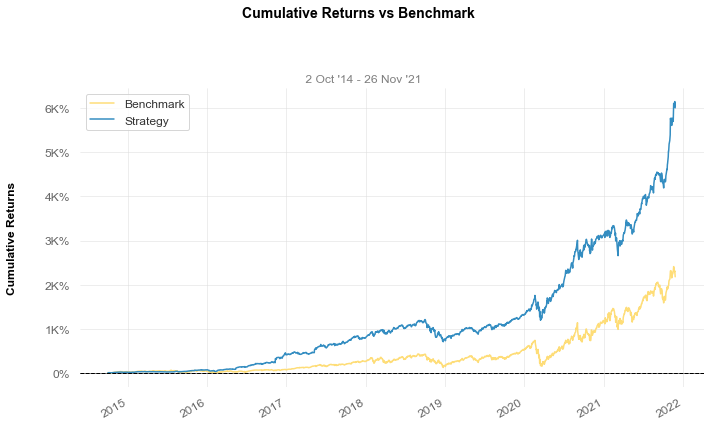

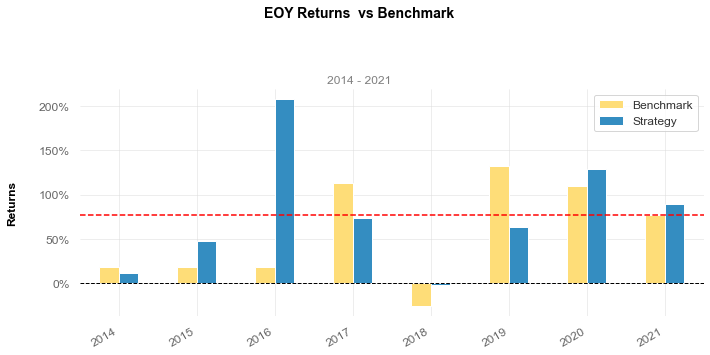

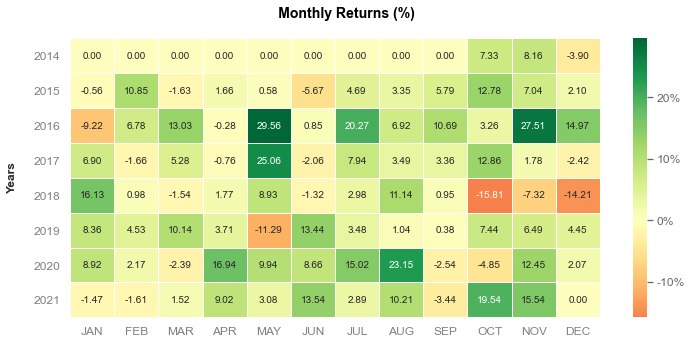

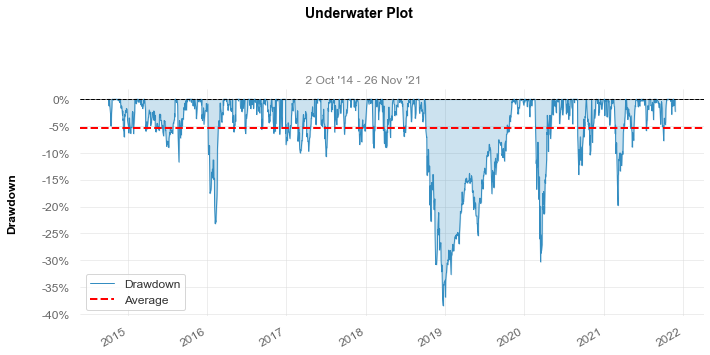

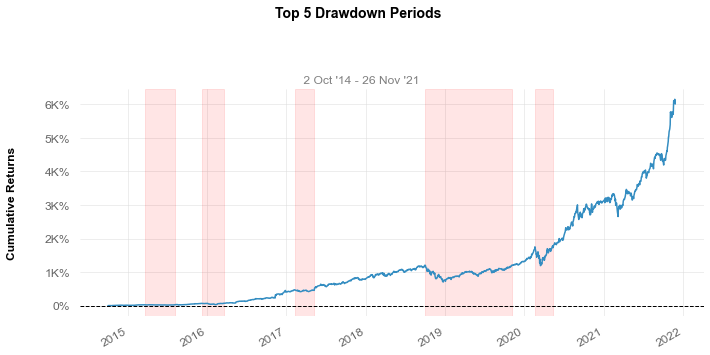

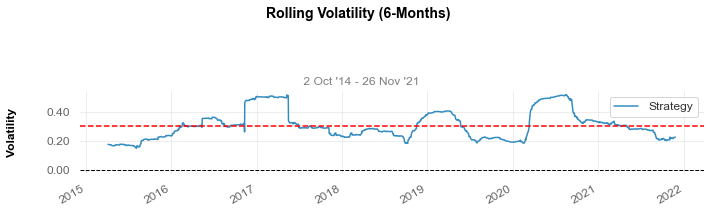

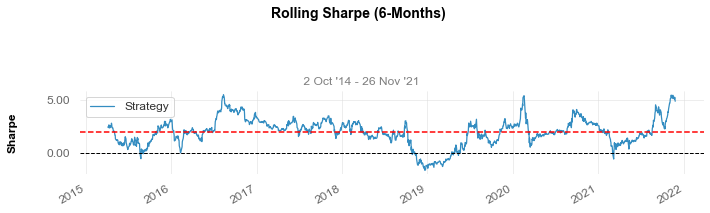

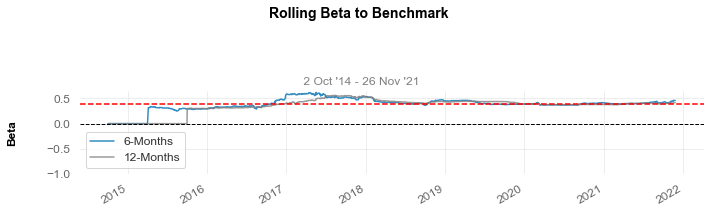

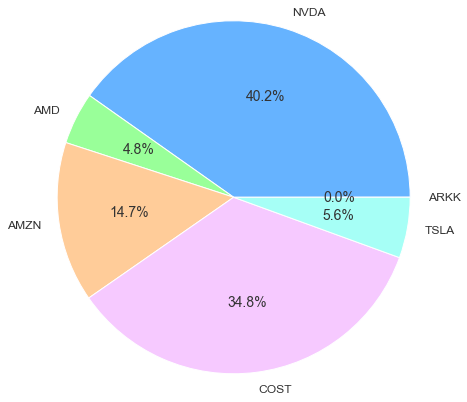

In [4]:
portfolio_MEANVAR = Engine(
    start_date = "2014-10-01",
    portfolio = ['ARKK', 'TQQQ', 'NVDA', 'AMD', 'ADBE', 'GOOG', 'AMZN', 'AAPL',
                'EBAY', 'COST', 'ADP', 'TSLA', 'INTU', 'VTI'],
#     portfolio = [ticker for ticker in QQQ['Ticker']],
    benchmark = ['TQQQ'],
    optimizer = "EF",
    rebalance = "1y",
#     max_vol = 2
)

data = pd.DataFrame()

empyrial(portfolio_MEANVAR)

#EF ANNUAL 79.39%, CUM 6307.9%, VOL 31.32%, DRAW 39.15%, VAR 3.0%
#HRP severely underperforms benchmark with no upsides to risk control
# MEANVAR slightlty outperforms benchmark, no upsides to risk control

data['Returns'] = empyrial.returns

In [5]:
distributions = empyrial.orderbook[empyrial.orderbook != 0].loc[['ARKK', 'NVDA', 'AMD', 'ADBE', 'AMZN', 'AAPL', 'COST']].T.mean() * 100
print(distributions)
empyrial.orderbook[empyrial.orderbook != 0].loc[['ARKK', 'NVDA', 'AMD', 'ADBE', 'AMZN', 'AAPL', 'COST']].T

ARKK     0.065625
NVDA    43.251750
AMD      2.250000
ADBE    13.971600
AMZN     8.107000
AAPL    16.300750
COST    27.393375
dtype: float64


,ARKK,NVDA,AMD,ADBE,AMZN,AAPL,COST
2015-01-01,0.00308,0.01060,NaN,NaN,NaN,0.43308,0.38372
2016-01-01,0.00050,0.41972,NaN,0.09036,0.08115,NaN,0.40828
2016-12-31,0.00042,0.92434,NaN,NaN,0.02375,NaN,0.05148
2017-12-31,0.00022,0.59391,NaN,0.13115,0.09254,0.01655,0.16563
2018-12-31,0.00025,0.39665,NaN,0.24723,0.14178,NaN,0.18115
2019-12-31,0.00027,0.28448,0.02817,0.22261,0.01818,0.11838,0.32791
2020-12-30,0.00033,0.37515,0.02404,0.00723,0.12902,0.08402,0.25697
2021-11-27,0.00018,0.45529,0.01529,NaN,NaN,NaN,0.41633


This gave us a good distribution with a surprisingly small weight allocated to the leveraged NASDAQ ETF. Now we just pass in the DataFrame and check out the results.

In [6]:
df_regOutput = assetPriceReg(data)

             Returns     MKT     SMB     HML     RMW     CMA     RF     XsRet
2016-11-28 -0.001120 -0.0064 -0.0077  0.0009  0.0070 -0.0035  0.001 -0.002120
2016-11-29 -0.008510  0.0011 -0.0037 -0.0006  0.0048 -0.0050  0.001 -0.009510
2016-11-30 -0.011251 -0.0025 -0.0020  0.0222 -0.0153  0.0200  0.001 -0.012251
2016-12-01 -0.045386 -0.0036 -0.0038  0.0204  0.0039  0.0062  0.001 -0.046386
2016-12-02  0.008560  0.0000 -0.0001 -0.0033 -0.0013  0.0009  0.001  0.007560
...              ...     ...     ...     ...     ...     ...    ...       ...
2021-10-25  0.030448  0.0058  0.0037 -0.0016 -0.0039 -0.0035  0.000  0.030448
2021-10-26  0.025962  0.0004 -0.0081 -0.0032 -0.0038 -0.0012  0.000  0.025962
2021-10-27  0.000240 -0.0076 -0.0095 -0.0119  0.0086 -0.0060  0.000  0.000240
2021-10-28  0.014460  0.0114  0.0081 -0.0047 -0.0030 -0.0018  0.000  0.014460
2021-10-29  0.016042  0.0022  0.0013 -0.0082  0.0057 -0.0085  0.000  0.016042

[1235 rows x 8 columns]

The CAPM Results are: 
               

Let's unpack the results. The first output is the merged DataFrame with the portfolio returns, excess market returns, Fama-French factors, the risk-free rate, and the excess portfolio returns (in that order).

The second output is the table of results for the CAPM model. We got an adjusted r-squared of 61.8%, a p-value near zero, and a MKT coefficient of 0.7486. This coefficient matches the beta calculated in our Empyrial report, so we can confirm that this weight distribution provides a portfolio that is less volatile than the broad market.

Next are the results of the 3 and 5 factor models. I won't go over the 3 factor results since these three factors are also included in the 5 factor model. The 5 factor results show only a marginal increase in adjusted r-squared from 61.8% to 62.5%, meaning that although the model is statistically significant, there are still factors at play in the portfolio that the model is not accounting for.

You should also take a look at the coefficients of the factors. All of the factors show statistical significance from their p-values. The portfolio shows minimal exposure to small-cap, value, low-earning, and aggressive investing stocks. This may be due to the number of ETFs in the portfolio. Overall, it's clear that there's a lot that can be improved upon with our portfolio and our model.


# Alpha, the Dark Matter of Investing

Before I walk through picking assets based on factors, I want to make a quick tangent to circle back to my physics analogy.
Remember my little spiel about blindly attributing the unknown factors of the universe to the mystery of divinity? Well, that also applies to factor models in finance. You see, before the creation of advanced models like the Fama-French 3 and 5 factor models, the CAPM left a significant amount of portfolio returns left unexplained, just like how Newton's laws were insufficient for black holes and the expansion of the universe. So, what's the financial equivalent of dark matter and dark energy? The answer is alpha.

Alpha is often described as a portfolio's edge or abnormal return. It's the fraction of returns that can't be attributed to some factor of a model, and it can therefore be attributed to anything, such as a portfolio manager's skill or blind luck.

As you saw in our example portfolio, the CAPM model was only able to explain 61.8% of returns. If I were a portfolio manager, I could boast to clients that 38.2% of my portfolio returns could be attributed to my skill! But that just isn't true. 

The 5 factor model shows that more of my returns can be attributed to other factors (this will be more clear with my next example). An even more sophisticated model might explain even more of my returns, driving my alpha down as the model's adjusted r-squared increases.

So when analyzing your portfolio with a model, please do not jump to the conclusion that any alpha you discover is because you're an profound genius. Instead, be humble and scientific and consider how you might improve your model to find other factors that explain your returns.

Now, with that noted, let's see if we can increase our expected average return by creating a portfolio of stocks with high exposure to these risks.

# Picking Stocks To Optimize Exposure
## Market Exposure Factor
The key to increasing your market exposure factor is to pick an asset that is more volatile than the overall market. With that in mind, what better choice is there than a triple leveraged ETF like TQQQ? We chose it in our original portfolio, but let's look at how it does on its own.

In [151]:
TQQQ = yf.Ticker("TQQQ")
returns_df = pd.DataFrame()
close_hist = TQQQ.history(period = "5y", auto_adjust = True, interval = "1d").dropna()['Close']
returns_df['Returns'] = close_hist.pct_change().dropna()

df_regOutput = assetPriceReg(returns_df)

             Returns     MKT     SMB     HML     RMW     CMA     RF     XsRet
Date                                                                         
2016-10-11 -0.041337 -0.0130 -0.0056  0.0046  0.0042  0.0008  0.001 -0.042337
2016-10-12 -0.002084  0.0006 -0.0021  0.0035  0.0073  0.0013  0.001 -0.003084
2016-10-13 -0.011726 -0.0042 -0.0074 -0.0064  0.0031 -0.0015  0.001 -0.012726
2016-10-14  0.002275  0.0001 -0.0035  0.0058  0.0010  0.0010  0.001  0.001275
2016-10-17 -0.006892 -0.0029 -0.0002  0.0016  0.0011  0.0011  0.001 -0.007892
...              ...     ...     ...     ...     ...     ...    ...       ...
2021-08-25  0.001117  0.0026  0.0007  0.0034 -0.0042 -0.0002  0.000  0.001117
2021-08-26 -0.016944 -0.0066 -0.0045 -0.0031 -0.0002 -0.0014  0.000 -0.016944
2021-08-27  0.029224  0.0108  0.0165  0.0030 -0.0072  0.0017  0.000  0.029224
2021-08-30  0.033150  0.0035 -0.0070 -0.0138  0.0066  0.0014  0.000  0.033150
2021-08-31 -0.002802 -0.0013  0.0044 -0.0005 -0.0047 -0.0021  0.

Look at that. The 5 factor model explains 93.7% of the variance of TQQQ's returns and provides a beta of 3.2. True to the ETF's description, it is indeed three times leveraged.

## Small Minus Big Factor

Admittedly I have zero experience researching or trading small-cap companies. So rather than try to pick a solid one, I'll cop out with the ETF approach again. VBR is Vanguard's small-cap value ETF, so it should provide some exposure to two of the five factors. Let's see.

In [152]:
VBR = yf.Ticker("VBR")
returns_df = pd.DataFrame()
close_hist = VBR.history(period = "5y", auto_adjust = True, interval = "1d").dropna()['Close']
returns_df['Returns'] = close_hist.pct_change().dropna()

df_regOutput = assetPriceReg(returns_df)

             Returns     MKT     SMB     HML     RMW     CMA     RF     XsRet
Date                                                                         
2016-10-11 -0.014789 -0.0130 -0.0056  0.0046  0.0042  0.0008  0.001 -0.015789
2016-10-12  0.002670  0.0006 -0.0021  0.0035  0.0073  0.0013  0.001  0.001670
2016-10-13 -0.006153 -0.0042 -0.0074 -0.0064  0.0031 -0.0015  0.001 -0.007153
2016-10-14 -0.000370  0.0001 -0.0035  0.0058  0.0010  0.0010  0.001 -0.001370
2016-10-17 -0.001109 -0.0029 -0.0002  0.0016  0.0011  0.0011  0.001 -0.002109
...              ...     ...     ...     ...     ...     ...    ...       ...
2021-08-25  0.006080  0.0026  0.0007  0.0034 -0.0042 -0.0002  0.000  0.006080
2021-08-26 -0.010245 -0.0066 -0.0045 -0.0031 -0.0002 -0.0014  0.000 -0.010245
2021-08-27  0.021517  0.0108  0.0165  0.0030 -0.0072  0.0017  0.000  0.021517
2021-08-30 -0.007287  0.0035 -0.0070 -0.0138  0.0066  0.0014  0.000 -0.007287
2021-08-31 -0.000115 -0.0013  0.0044 -0.0005 -0.0047 -0.0021  0.

The results don't look too shabby. Since the p-values of the SMB and HML values are statistically significant (less than 0.5) and the coefficients are both positive, this ETF would provide some decent exposure for these two factors.

## High Minus Low Factor

Now we already have some exposure for this factor from VBR, but I want to try to round out the portfolio with one stock for each factor. Oddly enough, BAC actually provides good exposure for this factor at a coefficient of 0.94.

In [171]:
BAC = yf.Ticker("BAC")
returns_df = pd.DataFrame()
close_hist = XLE.history(period = "5y", auto_adjust = True, interval = "1d").dropna()['Close']
returns_df['Returns'] = close_hist.pct_change().dropna()

df_regOutput = assetPriceReg(returns_df)

             Returns     MKT     SMB     HML     RMW     CMA     RF     XsRet
Date                                                                         
2016-10-11 -0.011433 -0.0130 -0.0056  0.0046  0.0042  0.0008  0.001 -0.012433
2016-10-12 -0.004231  0.0006 -0.0021  0.0035  0.0073  0.0013  0.001 -0.005231
2016-10-13 -0.005524 -0.0042 -0.0074 -0.0064  0.0031 -0.0015  0.001 -0.006524
2016-10-14 -0.005840  0.0001 -0.0035  0.0058  0.0010  0.0010  0.001 -0.006840
2016-10-17 -0.004871 -0.0029 -0.0002  0.0016  0.0011  0.0011  0.001 -0.005871
...              ...     ...     ...     ...     ...     ...    ...       ...
2021-08-25  0.007645  0.0026  0.0007  0.0034 -0.0042 -0.0002  0.000  0.007645
2021-08-26 -0.015173 -0.0066 -0.0045 -0.0031 -0.0002 -0.0014  0.000 -0.015173
2021-08-27  0.026650  0.0108  0.0165  0.0030 -0.0072  0.0017  0.000  0.026650
2021-08-30 -0.011762  0.0035 -0.0070 -0.0138  0.0066  0.0014  0.000 -0.011762
2021-08-31 -0.006772 -0.0013  0.0044 -0.0005 -0.0047 -0.0021  0.

## High Future Earnings Factor

These last two factors were tricky. As far as I could tell, there are no ETFs that index based on predicted earnings growth. Instead I took a trial-and-error approach to find what sort of stocks suited these factors well. I found that many tech companies such as FB did not perform as well as I expected in this factor. AMZN came in around 0.32. Ultimately I settled on COKE, with a RMW coefficient of 0.76

In [154]:
COKE = yf.Ticker("COKE")
returns_df = pd.DataFrame()
close_hist = COKE.history(period = "5y", auto_adjust = True, interval = "1d").dropna()['Close']
returns_df['Returns'] = close_hist.pct_change().dropna()

df_regOutput = assetPriceReg(returns_df)

             Returns     MKT     SMB     HML     RMW     CMA     RF     XsRet
Date                                                                         
2016-10-11 -0.009041 -0.0130 -0.0056  0.0046  0.0042  0.0008  0.001 -0.010041
2016-10-12  0.010620  0.0006 -0.0021  0.0035  0.0073  0.0013  0.001  0.009620
2016-10-13  0.000564 -0.0042 -0.0074 -0.0064  0.0031 -0.0015  0.001 -0.000436
2016-10-14 -0.010714  0.0001 -0.0035  0.0058  0.0010  0.0010  0.001 -0.011714
2016-10-17  0.006270 -0.0029 -0.0002  0.0016  0.0011  0.0011  0.001  0.005270
...              ...     ...     ...     ...     ...     ...    ...       ...
2021-08-25 -0.003949  0.0026  0.0007  0.0034 -0.0042 -0.0002  0.000 -0.003949
2021-08-26 -0.012399 -0.0066 -0.0045 -0.0031 -0.0002 -0.0014  0.000 -0.012399
2021-08-27  0.022628  0.0108  0.0165  0.0030 -0.0072  0.0017  0.000  0.022628
2021-08-30  0.002625  0.0035 -0.0070 -0.0138  0.0066  0.0014  0.000  0.002625
2021-08-31  0.012868 -0.0013  0.0044 -0.0005 -0.0047 -0.0021  0.

## Conservative Investing Factor

As with the high future earnings factor, I did not find an ETF based on investment of capital. Instead I searched for "conservative companies", which landed me on an oddly political search index. Eventually I found that many oil and gas companies, such as CVX, had high coefficients for this factor. The highest coefficient I could find was with GE at 0.5.

In [155]:
GE = yf.Ticker("GE")
returns_df = pd.DataFrame()
close_hist = GE.history(period = "5y", auto_adjust = True, interval = "1d").dropna()['Close']
returns_df['Returns'] = close_hist.pct_change().dropna()

df_regOutput = assetPriceReg(returns_df)

             Returns     MKT     SMB     HML     RMW     CMA     RF     XsRet
Date                                                                         
2016-10-11  0.002079 -0.0130 -0.0056  0.0046  0.0042  0.0008  0.001  0.001079
2016-10-12 -0.000691  0.0006 -0.0021  0.0035  0.0073  0.0013  0.001 -0.001691
2016-10-13 -0.004498 -0.0042 -0.0074 -0.0064  0.0031 -0.0015  0.001 -0.005498
2016-10-14  0.004171  0.0001 -0.0035  0.0058  0.0010  0.0010  0.001  0.003171
2016-10-17 -0.001385 -0.0029 -0.0002  0.0016  0.0011  0.0011  0.001 -0.002385
...              ...     ...     ...     ...     ...     ...    ...       ...
2021-08-25  0.013847  0.0026  0.0007  0.0034 -0.0042 -0.0002  0.000  0.013847
2021-08-26 -0.012607 -0.0066 -0.0045 -0.0031 -0.0002 -0.0014  0.000 -0.012607
2021-08-27  0.026214  0.0108  0.0165  0.0030 -0.0072  0.0017  0.000  0.026214
2021-08-30 -0.008483  0.0035 -0.0070 -0.0138  0.0066  0.0014  0.000 -0.008483
2021-08-31  0.002091 -0.0013  0.0044 -0.0005 -0.0047 -0.0021  0.

Now let's create a new portfolio from these five assets and see how we do.

In [14]:
portfolio_5_factor = Engine(
    start_date = "2016-10-01",
    portfolio = ['ZAG', 'XIC', 'VUN', 'AVDV', 'XEC'],
    optimizer = "HRP",
    rebalance = "1y",
    #max_vol = 23
)

five_factor_data = pd.DataFrame()

empyrial(portfolio_5_factor)

five_factor_data['Returns'] = empyrial.returns

df_regOutput = assetPriceReg(five_factor_data)


1 Failed download:
- AVDV: Data doesn't exist for startDate = 1451635800, endDate = 1483171800


ValueError: The condensed distance matrix must contain only finite values.

# Findings

As you can see from the report, the portfolio created with these stocks tailored towards factor performance did not outperform our original portfolio. The original portfolio had a cumulative return of 321% and a max drawdown of -27%. The new portfolio based on the five factors has a cumulative return of 249% and a max drawdown of -51% over the same five year period. That is a difference of 72% in returns and 24% in maximum drawdown.

However, also consider the factor coefficients and adjusted r-squared of the five factor portfolio. We now have positive exposure to four of the five factors, and the model explains 89.7% of variation in returns. The original portfolio only had positive exposure in two factors, and the model only explained 62.5% of variation in returns.

Therefore, the five factor portfolio might see greater returns over a longer time period with the positive exposure to more factors, and the five factor model can explain more of the returns of that portfolio.

It is difficult to compare these two portfolios across a longer time period with my current approach since I do not have a way to update the holdings as companies become listed or delisted.

# Notes and Considerations

You may be wondering "well if the returns are worse, then why bother picking stocks based on factors?" That's a fair question to ask, but before you brush off factor investing, let me bring a few key considerations to your attention.

I think the most important thing to note is that these five factors typically outperform their conterparts - that does not mean that they always outperform. There are some market conditions where their counterparts will outperform, such as when growth stocks do better than value stocks. But factor investing is about identifying factors that have a greater probability of outperforming the market, and betting on that outperformance in the long run.

The second consideration ties in with the first. According to Investopedia:

"Fama and French highlighted that investors must be able to ride out the extra volatility and periodic underperformance that could occur in a short time. Investors with a long-term time horizon of 15 years or more will be rewarded for losses suffered in the short term."

In other words, if you are not a long-term investor, consider a different approach to select stocks, and maybe build your own model that suits your holding periods.

Given these two considerations, I feel it would be inappropriate to dismiss this approach to stock selection because:

1. I selected these stocks manually. Ideally you would scan through a universe of stocks at every rebalancing period to select the ones with the highest coefficient for your desired factors.

2. My back-test only calculated on 5 years of data, 33.3% of the recommended holding period.

Fourth, there is research that the Fama-French model does not work well with foreign securities. This makes sense considering this footnote from Dartmouth:

"Rm-Rf includes all NYSE, AMEX, and NASDAQ firms. SMB, HML, RMW, and CMA for July of year t to June of t+1 include all NYSE, AMEX, and NASDAQ stocks for which we have market equity data for December of t-1 and June of t, (positive) book equity data for t-1 (for SMB, HML, and RMW), non-missing revenues and at least one of the following: cost of goods sold, selling, general and administrative expenses, or interest expense for t-1 (for SMB and RMW), and total assets data for t-2 and t-1 (for SMB and CMA)."

The model is tailored towards the US market. If you are investing in a non-US market, consider using a different model or tailor your own model to your market data.

Lastly, there are many datasets available from pandas_datareader. I have not had the time to explore all of these datasets and what they have to offer, but if you are interested in exploring them, here are two lines of code you can use to explore the data available:

In [172]:
from pandas_datareader import famafrench

famafrench.get_available_datasets()

{'symbols': 'SPY',
 'start': Timestamp('2016-10-11 00:00:00'),
 'end': Timestamp('2021-10-10 00:00:00'),
 'retry_count': 3,
 'pause': 0.1,
 'timeout': 30,
 'pause_multiplier': 1,
 'session': <requests.sessions.Session at 0x25fc9470c70>,
 'freq': None,
 'headers': None}

# In Summary

Now you know what factor models are, how they are designed to explain independent variables as function of dependent variables, and how to apply factor investing to your portfolio and stock selection using CAPM and the Fama-French 3 and 5 factor models. In our example, the factor-based portfolio did not outperform our initial portfolio across the last five years. However, as I discussed in the notes and considerations, we may not have chosen the best stocks and given the back-testing sufficient time to show the true power of this approach.

Honestly, I don't think I've ever put this much time into research for any of the academic papers I wrote. I've included all of the sources I researched down below, so if you would like to continue learning about factor investing, take a look. You can also clone the Jupyter notebook with all of the code from my GitHub repository.

I truly hope that this story has given you insight into this awesome approach to investing. I think it's exciting that this research is still relatively new because that means that my generation has the potential to magnify their investing returns by implementing factor analysis. 

I plan on using this approach for my own investments; I just need to automate a way to filter through all available assets to find the right ones for each factor. When I figure out how to do that, I'll be sure to share the resource with all of you!

# References

1. [Factor Analysis Example - Real Statistics](https://www.real-statistics.com/multivariate-statistics/factor-analysis/factor-analysis-example/#:~:text=%20Factor%20Analysis%20Example%20%201%20Setting%20high,for%20teaching%209%20Friendly%20and%20easy-going%20More%20)
2. [Astrophysics for People In A Hurry by Neil DeGrasse Tyson](https://thephysicsversescience.files.wordpress.com/2020/07/astrophysics.pdf)
3. [Albert Einstein - Wikipedia](https://en.wikipedia.org/wiki/Albert_Einstein#General_relativity)
4. [Asset Pricing And Factor Regression - Pythonic Finance](https://randlow.github.io/posts/finance-economics/asset-pricing-regression/#disqus_thread)
5. [Reading Data From Ken French's Website - Pythonic Finance](https://randlow.github.io/posts/finance-economics/pandas-datareader-KF/)
6. [Fama-French Reader - Pandas Datareader](https://pandas-datareader.readthedocs.io/en/latest/readers/famafrench.html)
7. [yfinance documentation](https://pypi.org/project/yfinance/)
8. [Intro to Factor Analysis - DataCamp](https://www.datacamp.com/community/tutorials/introduction-factor-analysis)
9. [CAPM Explained - SmartAsset](https://smartasset.com/investing/capital-asset-pricing-model)
10. [Discounted Cash Flow - SmartAsset](https://smartasset.com/financial-advisor/discounted-cash-flow)
11. [Capital Asset Pricing Model - Corporate Finance Institute](https://corporatefinanceinstitute.com/resources/ebooks/investment-banking/capital-asset-pricing-model-capm-guide/#:~:text=Capital%20Asset%20Pricing%20Model%20%28CAPM%29%201%20Assumptions%20of,A%20summary%20of%20risk%2Freturn%20models%20More%20items...%20)
12. [What is Capital Asset Pricing Model - My Accounting Course](https://www.myaccountingcourse.com/accounting-dictionary/capital-asset-pricing-model)
13. [Capital Asset Pricing Model - Investopedia](https://www.investopedia.com/terms/c/capm.asp#:~:text=The%20Capital%20Asset%20Pricing%20Model%20%28CAPM%29%20describes%20the,of%20capital.%20Capital%20Asset%20Pricing%20Model%20-%20CAPM)
14. [Explaining the Capital Asset Pricing Model](https://www.investopedia.com/articles/06/capm.asp)
15. [What is the Capital Asset Pricing Model - Learn to Invest](https://www.youtube.com/watch?v=-fCYZjNA7Ps)
16. [The Capital Asset Pricing Model - Professor Alex Shapiro](http://people.stern.nyu.edu/ashapiro/courses/B01.231103/FFL09.pdf)
17. [What is CAPM - Tutorials Point](https://www.tutorialspoint.com/what-is-capital-asset-pricing-model-capm)
18. [The Capital Asset Pricing Model - Eugene Fama and Kenneth French](http://mba.tuck.dartmouth.edu/bespeneckbo/default/AFA611-Eckbo%20web%20site/AFA611-S6B-FamaFrench-CAPM-JEP04.pdf)
19. [What is Capital Asset Pricing Model and Its Assumptions - Googlesir](https://www.googlesir.com/assumptions-capital-asset-pricing-model-capm/)
20. [Discounted Cash Flow with Python – Valuing a Company - Coding And Fun](https://codingandfun.com/discounted-cash-flow-with-python-valuing-a-company/#:~:text=Discounted%20Cash%20Flow%20with%20Python%201%20A.%20Estimating,...%207%20H.%20Calculating%20Google%20Target%20Price.%20)
21. [How to Calculate Discounted Cash Flows with Python - Towards Data Science](https://towardsdatascience.com/how-to-calculate-discounted-cash-flows-with-python-a88f12a48d5c)
22. [Use Python to Value a Stock Automatically - Data Driven Investor](https://medium.datadriveninvestor.com/use-python-to-value-a-stock-automatically-3b520422ab6)
23. [Automating the DCF Valuation - Towards Data Science](https://towardsdatascience.com/automating-the-dcf-valuation-35abde04cdb9)
24. [Intrinsic Valuation of Stocks Using Python - Start It Up](https://medium.com/swlh/intrinsic-valuation-of-stocks-using-python-5d902a34b1a0)
25. [Factor Analysis - Xian-Li Xue](https://cdn1.sph.harvard.edu/wp-content/uploads/sites/59/2016/10/harvard-lecture-series-session-4_Factor-analysis.pdf)
26. [Multi-factor Model - Corporate Finance Institute](https://corporatefinanceinstitute.com/resources/knowledge/other/multi-factor-model/)
27. [Fama-French and 3 Factor Model - Investopedia](https://www.investopedia.com/terms/f/famaandfrenchthreefactormodel.asp)
28. [Factor Investing - Investopedia](https://www.investopedia.com/terms/f/factor-investing.asp)
29. [Valuation in Four Lessons - Aswath Damodaran](https://www.youtube.com/watch?v=Z5chrxMuBoo)
30. [Discounted Cash Flow - Learn to Invest](https://www.youtube.com/watch?v=fd_emLLzJnk)
31. [Capital Asset Pricing Model - Wikipedia](https://en.wikipedia.org/wiki/Capital_asset_pricing_model)
32. [Interpreting the results of Linear Regression using OLS Summary - Geeks For Geeks](https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/)
33. [F-Statistic - Statistics How To](https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/)
34. [Adding A Constant When Using sm.OLS - StackOverflow](https://stackoverflow.com/questions/30286095/do-i-need-to-add-a-constant-when-using-sm-ols)
35. [Ordinary Least Squares Regression - The University of Utah](https://soc.utah.edu/sociology3112/regression.php#:~:text=Ordinary%20least%20squares%20%28OLS%29%20regression%20is%20a%20process,the%20inclusion%20of%20%22least%20squares%22%20in%20the%20name%29.)
36. [The Mass of an Adult - The Physics Factbook](https://hypertextbook.com/facts/2003/AlexSchlessingerman.shtml#:~:text=%20%20%20%20Bibliographic%20Entry%20%20,%2070%20kg%20%201%20more%20rows%20)
37. [How to Perform Simple Linear Regression in Python - Statology](https://www.statology.org/simple-linear-regression-in-python/#:~:text=How%20to%20Perform%20Simple%20Linear%20Regression%20in%20Python,Linear%20Regression.%20...%204%20Create%20Residual%20Plots.%20)
38. [Simple and Multiple Linear Regression in Python - Geeks for Geeks](https://www.geeksforgeeks.org/linear-regression-python-implementation/)
39. [Description of Fama French Factors - Dartmouth](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html)
40. [Factor Models - MIT](https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/lecture-notes/MIT18_S096F13_lecnote15.pdf)
41. [Factor Models - Wall Street Mojo](https://www.wallstreetmojo.com/factor-models/)
42. [Factor Investing GitHub Repos](https://github.com/topics/factor-investing)
43. [Filib - Factor Investing Python Library](https://pypi.org/project/filib/)
44. [Alpha - Investopedia](https://www.investopedia.com/terms/a/alpha.asp)
45. [Factor Investing With ETFs - Ben Felix](https://www.youtube.com/watch?v=jKWbW7Wgm0w&list=LL&index=2)
46. [Black hole at the center of the Milky Way](https://www.nasa.gov/mission_pages/chandra/images/black-hole-bounty-captured-in-the-milky-way-center.html)